---
format:
  html:
    code-line-numbers: true
    code-overflow: wrap
    code-block-bg: true
    code-block-border-left: true
    highlight-style: Arrow
---

# The N-queens Problem {#sec-nqueens}

\begin{align}
    \text{max.} &\quad \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} x_{ij} \\
    \text{s.t.} &\quad \sum_{j=0}^{n-1} x_{ij} \leq 1, \ \forall i = 0, \cdots, n-1 \\
    &\quad \sum_{i=0}^{n-1} x_{ij} \leq 1, \ \forall j = 0, \cdots, n-1\\
    &\quad \sum_{i=0}^{n-1} \sum_{j=0, i+j=k}^{n-1} x_{ij} \leq 1, \ \forall k = 1, \cdots, 2(n-1) - 1\\
    &\quad \sum_{i=0}^{n-1} \sum_{j=0, i-j=k}^{n-1} x_{ij} \leq 1, \ \forall k = 2-n, \cdots, n-2\\
\end{align}

In [52]:
from ortools.linear_solver import pywraplp
import numpy as np
from itertools import product

class NQueensSolver:
    
    def __init__(self, size: int):
        self._size = size
        
        self._solver = None
        self._var_x = None
        self._opt_x = None
        
    def build_model(self):
        self._solver = pywraplp.Solver.CreateSolver('SCIP')

        self._var_x = np.empty((self._size, self._size), 
                            dtype=object)
        for i, j in product(range(self._size), 
                            range(self._size)):
            self._var_x[i][j] = \
                self._solver.BoolVar(name=f'x_{i,j}')

        expr = [self._var_x[i][j]
                for i in range(self._size)
                for j in range(self._size)]
        self._solver.Maximize(self._solver.Sum(expr))

        for row in range(self._size):
            expr = [self._var_x[row][j]
                    for j in range(self._size)]
            self._solver.Add(self._solver.Sum(expr) <= 1)

        for col in range(self._size):
            expr = [self._var_x[i][col]
                    for i in range(self._size)]
            self._solver.Add(self._solver.Sum(expr) <= 1)

        for k in range(1, 2 * (self._size - 1) - 1):
            expr = [self._var_x[i][j]
                    for i in range(self._size)
                    for j in range(self._size)
                    if i + j == k]
            self._solver.Add(self._solver.Sum(expr) <= 1)

        for k in range(2 - self._size, self._size - 2):
            expr = [self._var_x[i][j]
                    for i in range(self._size)
                    for j in range(self._size)
                    if i - j == k]
            self._solver.Add(self._solver.Sum(expr) <= 1)
    
    def optimize(self):
        status = self._solver.Solve()
        if status == pywraplp.Solver.OPTIMAL:
            self._opt_x = np.zeros((self._size, 
                                    self._size))
            for i, j in product(range(self._size), 
                                range(self._size)):
                self._opt_x[i][j] = \
                    self._var_x[i][j].solution_value()
        else:
            print("solve failure!")
            print(f"status={status}")

    @property
    def opt_x(self): return self._opt_x
    
    def get_queen_coordinates(self):
        coordinates = [(i, j) 
            for i in range(self._size)
            for j in range(self._size)
            if self._opt_x[i][j] == 1]
        return coordinates

In [44]:
#| echo: false

import sys
import numpy as np
sys.setrecursionlimit(10**6)
import matplotlib.pyplot as plt

class ChessBoard:
    def __init__(self, size):
        board = np.zeros((size,size))
        board[1::2,0::2] = 1
        board[0::2,1::2] = 1
        self.board = board
        self.size = size

    def make_board(self):
        fig, ax = plt.subplots(figsize=(10,10))
        ax.imshow(self.board, cmap='binary')
        ticks = [i for i in range(0, self.size)]
        ax.set(xticks = ticks, yticks = ticks)
        self.ax = ax

    def display(self, q_coordinates):
        fontsize = 100 - self.size*4 if 100 - self.size*4 > 10 else 15
        self.make_board()
        ax = self.ax
        for i in q_coordinates:
            ax.text(i[1], i[0],'♕', fontsize=fontsize, ha='center', va='center', color='black' if (i[0] - i[1]) % 2 == 0 else 'white')
        return ax

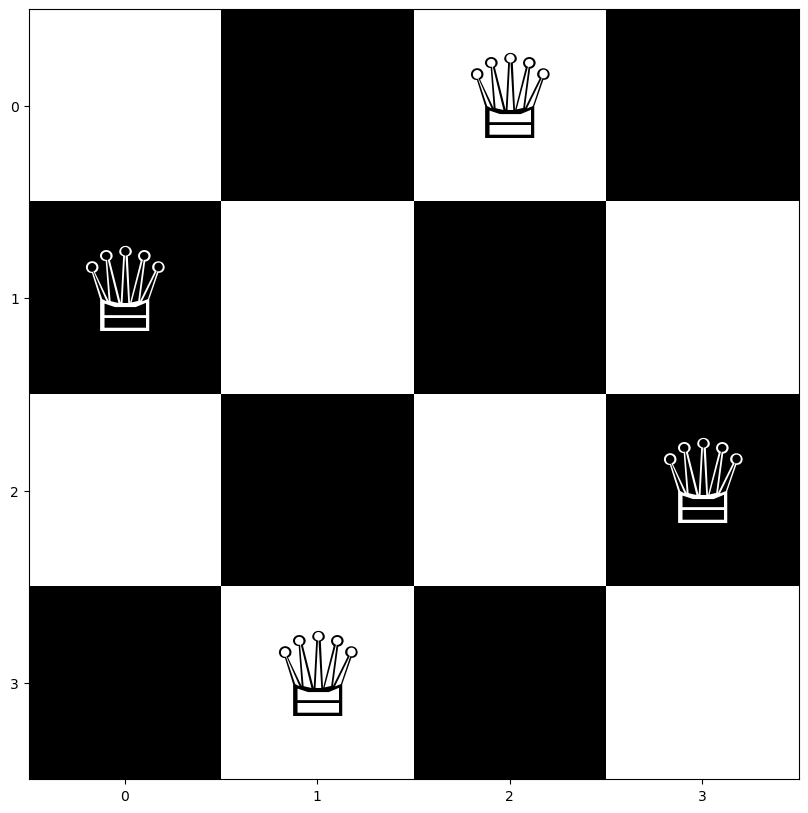

In [48]:
#| echo: false
#| label: fig-4-queens-sol
#| fig-cap: 4-Queens solution

size = 4

solver = NQueensSolver(size)
solver.build_model()
solver.optimize()

coordinates = solver.get_queen_coordinates()
chessBoard = ChessBoard(size)
ax = chessBoard.display(coordinates)
plt.show(ax)

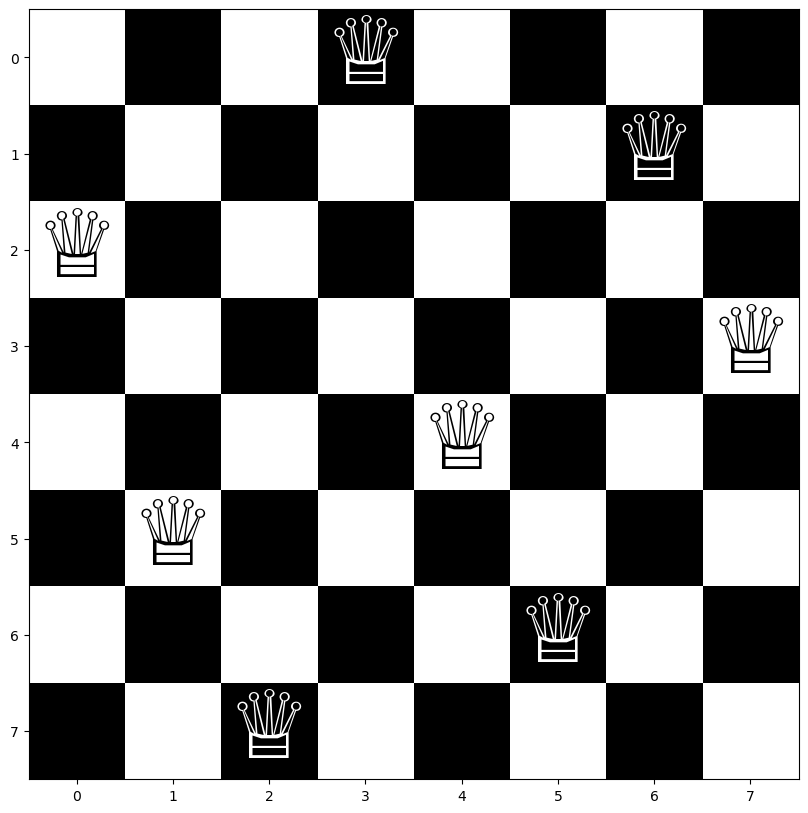

In [50]:
#| echo: false
#| label: fig-8-queens-sol
#| fig-cap: 8-Queens solution

size = 8

solver = NQueensSolver(size)
solver.build_model()
solver.optimize()

coordinates = solver.get_queen_coordinates()
chessBoard = ChessBoard(size)
ax = chessBoard.display(coordinates)
plt.show(ax)

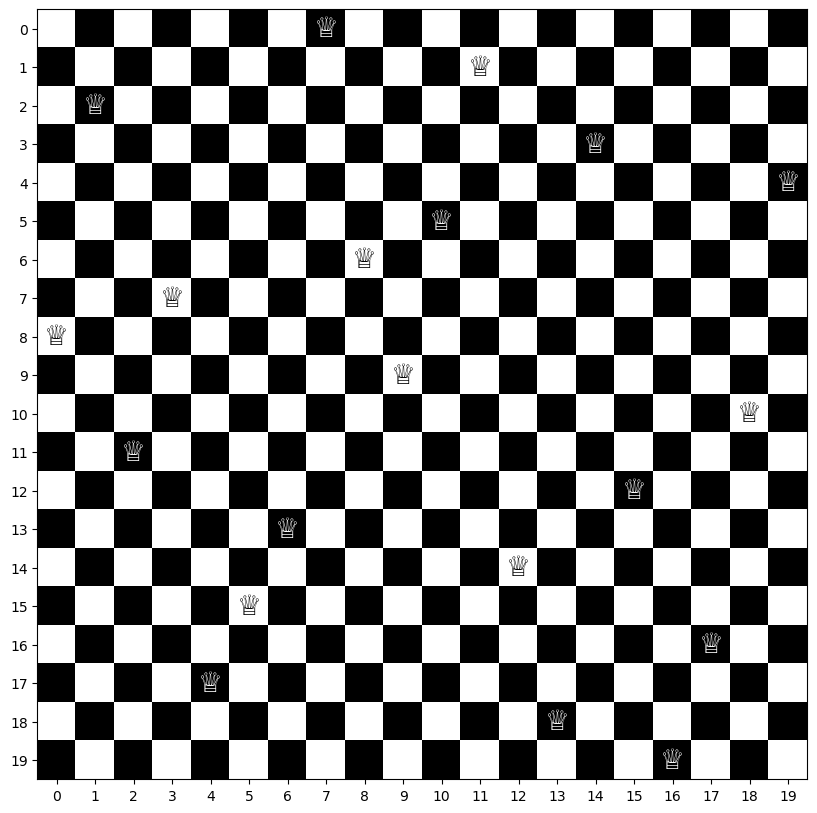

In [51]:
#| echo: false
#| label: fig-20-queens-sol
#| fig-cap: 20-Queens solution

size = 20

solver = NQueensSolver(size)
solver.build_model()
solver.optimize()

coordinates = solver.get_queen_coordinates()
chessBoard = ChessBoard(size)
ax = chessBoard.display(coordinates)
plt.show(ax)